<a href="https://colab.research.google.com/github/TapashKumar1/TapashKumar1/blob/main/XGBRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [23]:
house_data = pd.read_csv('/content/BostonHousing.csv')

In [24]:
print(house_data)

        crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  price
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...    ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88   11.9

[506 rows x 14 columns]


In [25]:
# Checking the No. of rows and columns
house_data.shape

(506, 14)

In [26]:
# Checking for Missing Values
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [30]:
# Inspecting the Statistical Measures of the Dataset
house_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

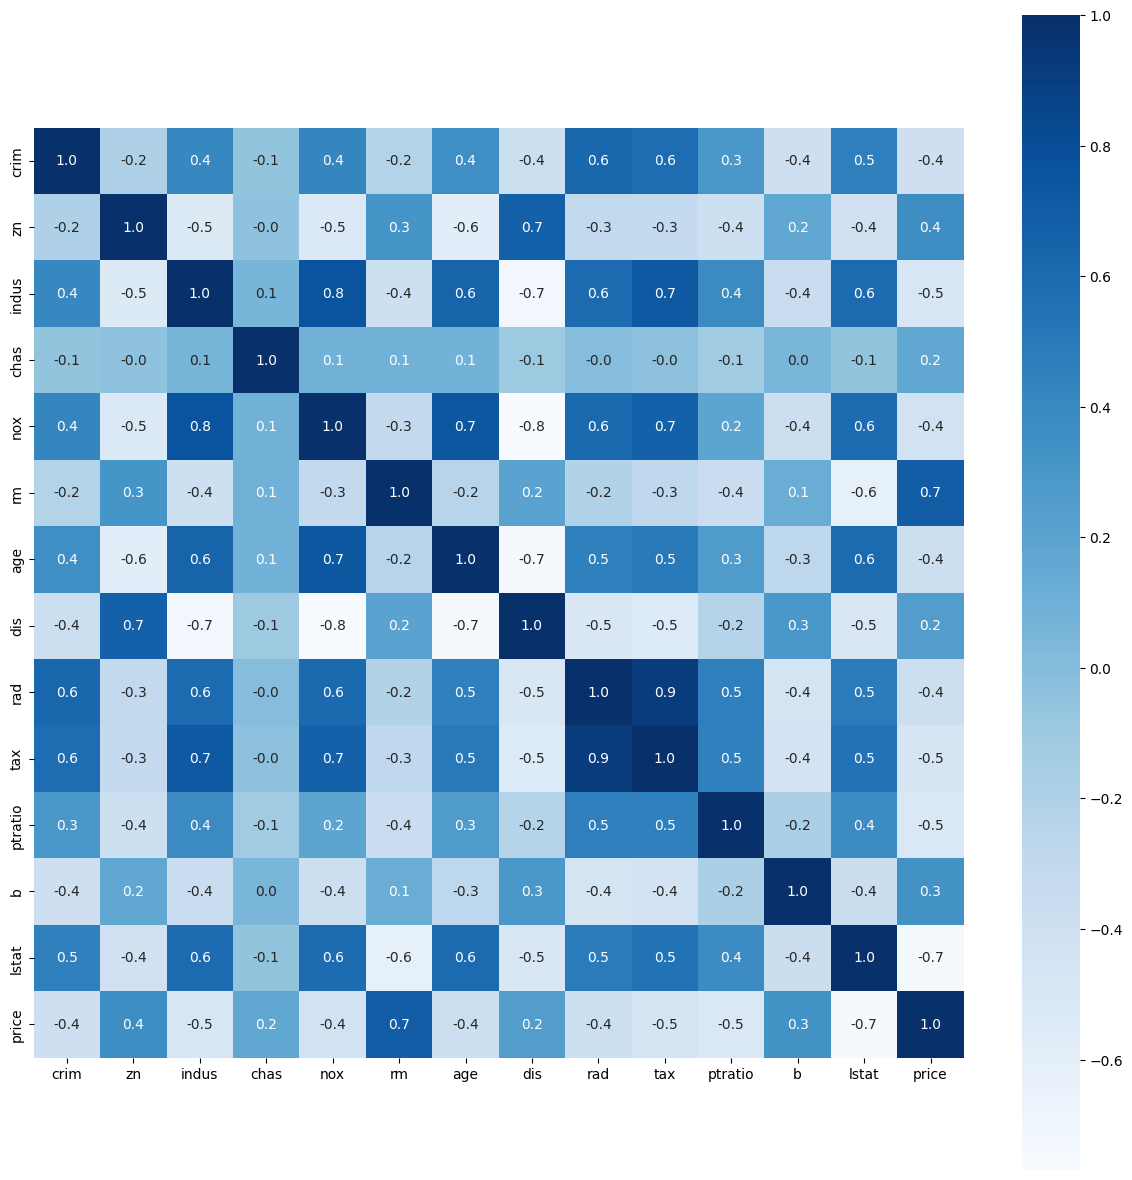

In [32]:
# Creating a Correlation Heatmap ofall the variables to check what varibales are correlated with each other
cor = house_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [35]:
#Splitting the Data and the Target
X = house_data.drop(['price'], axis=1)
Y = house_data['price']

In [36]:
print(X)

        crim    zn  indus  chas    nox  ...  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]


In [37]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [38]:
# Splitting the Data into Test and Train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state= 2)

In [39]:
# Checking the Shape of X_train and X_test
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (379, 13) (127, 13)


In [40]:
# Model Training
# XGBoost Regressor
# Loading the Model
model = XGBRegressor()

In [41]:
# Training the Model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
# Prediction on Training Data
trng_pred = model.predict(X_train)

In [43]:
print(trng_pred)

[19.38739   19.30414   24.80503   22.640144  31.714628  18.546268
  8.708887  17.401007  23.70193   13.284073  10.490422  12.6807375
 24.980278  19.69584   14.895035  24.206459  24.998747  14.899508
 16.97555   15.595914  12.702361  24.512486  15.013633  50.000397
 17.51173   21.19087   31.981804  15.59952   22.907333  19.304733
 18.688047  23.299255  37.194523  30.088747  33.117096  21.006447
 49.99733   13.4087925  5.0131063 16.499176   8.399259  28.665474
 19.494001  20.58943   45.39741   39.806133  33.400776  19.79944
 33.401264  25.289133  50.011395  12.523357  17.435204  18.602276
 22.583902  50.00525   23.752306  23.334106  23.08193   41.700096
 16.125595  31.601759  36.082943   6.998643  20.40104   19.978354
 11.996291  25.001768  49.992958  37.893578  23.098568  41.27309
 17.610167  16.29739   30.047798  22.876926  19.812428  17.09136
 18.903015  18.925978  22.593697  23.149546  33.181522  15.006614
 11.703503  18.79926   20.80968   17.994234  19.627028  49.999104
 17.209148  

In [44]:
# R squared error
score_1 = metrics.r2_score(Y_train,trng_pred)

In [45]:
print(score_1)

0.9999963975383529


In [46]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, trng_pred)
print(score_1)

0.9999963975383529


In [48]:
# Prediction on Test Data
test_pred = model.predict(X_test)

In [49]:
# Test Error Values
test_score_1 = metrics.r2_score(Y_test, test_pred)
test_score_2 = metrics.mean_absolute_error(Y_test, test_pred)
print(test_score_1)
print(test_score_2)

0.8920936995617591
2.0841140491755925


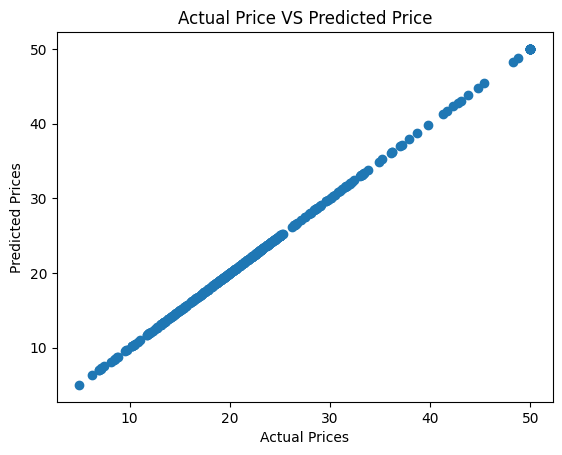

In [50]:
# Visualising the actual and predicted
plt.scatter(Y_train,trng_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title('Actual Price VS Predicted Price')
plt.show()

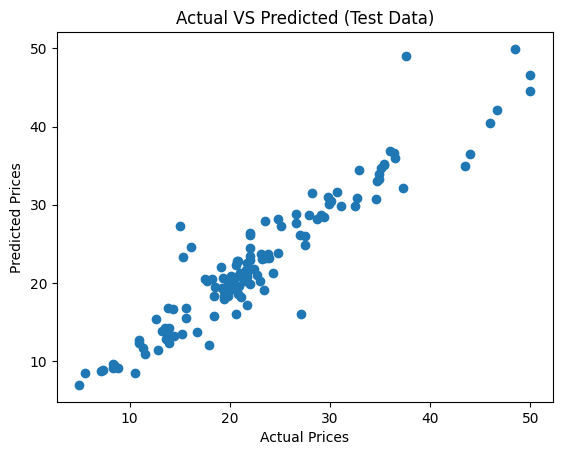

In [51]:
plt.scatter(Y_test,test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS Predicted (Test Data)')
plt.show()